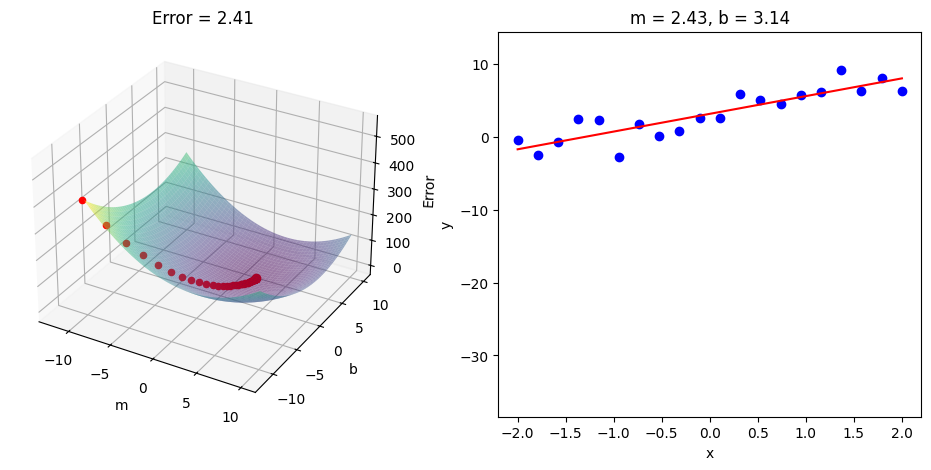

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some sample data
np.random.seed(0)
x = np.linspace(-2, 2, 20)
y = 3 * x + 2 + np.random.normal(scale=2, size=x.shape)

# Define the loss function
def compute_error(m, b, x, y):
    return np.mean((y - (m * x + b))**2)

# Gradient descent update
def gradient_descent_step(m, b, x, y, lr):
    N = len(y)
    dm = -2 / N * np.sum(x * (y - (m * x + b)))
    db = -2 / N * np.sum(y - (m * x + b))
    m -= lr * dm
    b -= lr * db
    return m, b

# Create a grid for the error surface
m_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
M, B = np.meshgrid(m_vals, b_vals)
Z = np.array([[compute_error(m, b, x, y) for m, b in zip(row_m, row_b)] for row_m, row_b in zip(M, B)])

# Initialize parameters
m, b = -12, -12
learning_rate = 0.05

# Set up the figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Plot the error surface
surf = ax1.plot_surface(M, B, Z, cmap='viridis', alpha=0.5, edgecolor='none')
point = ax1.plot([m], [b], [compute_error(m, b, x, y)], 'ro')[0]
ax1.set_xlabel('m')
ax1.set_ylabel('b')
ax1.set_zlabel('Error')
ax1.set_title('Error = {:.2f}'.format(compute_error(m, b, x, y)))

# Plot the data and initial line
ax2.scatter(x, y, color='blue')
line, = ax2.plot(x, m * x + b, 'r-')
ax2.set_title(f'm = {m:.2f}, b = {b:.2f}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Update function for animation
def update(frame):
    global m, b
    m, b = gradient_descent_step(m, b, x, y, learning_rate)
    error = compute_error(m, b, x, y)

    # plot previous points
    ax1.scatter([m], [b], [error], color='red')

    # Update the 3D point
    point.set_data([m], [b])
    point.set_3d_properties([error])
    ax1.set_title('Error = {:.2f}'.format(error))

    # Update the line in the 2D plot
    line.set_ydata(m * x + b)
    ax2.set_title(f'm = {m:.2f}, b = {b:.2f}')

    return point, line

# Create the animation
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=False)

# Save the animation (optional)
ani.save('gradient_descent.gif', writer='imagemagick')

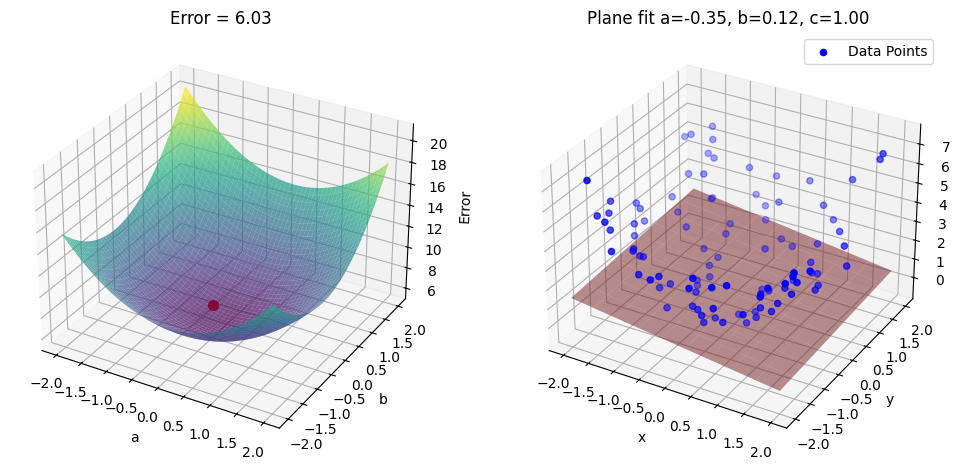

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm

# Generate some random data points for plane fitting
np.random.seed(42)
x_data = np.random.rand(100) * 4 - 2 # x values between -2 and 2
y_data = np.random.rand(100) * 4 - 2 # y values between -2 and 2
z_data = x_data**2 + y_data**2 + np.random.normal(0, 0.5, 100)  # z values with some noise

# Define the error function for plane fitting
def error_function(a, b, c):
    predicted_z = a * x_data + b * y_data + c
    error = np.sum((z_data - predicted_z) ** 2) / len(z_data)
    return error

# Grid of coefficients a, b
a_range = np.linspace(-2, 2, 50)
b_range = np.linspace(-2, 2, 50)
a_grid, b_grid = np.meshgrid(a_range, b_range)
c_value = 1.0  # Assume c is fixed for simplicity

# Compute the error for each pair of a, b
error_grid = np.array([[error_function(a, b, c_value) for b in b_range] for a in a_range])

# Function to find the gradient of the error function
def gradient(a, b, c):
    predicted_z = a * x_data + b * y_data + c
    error_grad_a = -2 * np.sum((z_data - predicted_z) * x_data) / len(z_data)
    error_grad_b = -2 * np.sum((z_data - predicted_z) * y_data) / len(z_data)
    return error_grad_a, error_grad_b

# Function to update the animation frame
def update(frame):
    global current_a, current_b, current_c, current_error

    ax1.clear()
    ax2.clear()


    # Plot Error Surface (Left)
    ax1.plot_surface(a_grid, b_grid, error_grid, cmap=cm.viridis, alpha=0.7)
    ax1.set_title(f'Error = {current_error:.2f}')
    ax1.set_xlabel('a')
    ax1.set_ylabel('b')
    ax1.set_zlabel('Error')
    ax1.scatter(current_a, current_b, current_error, color='r', s=50)  # Current point

    # Plot Data and Plane Fit (Right)
    ax2.scatter(x_data, y_data, z_data, color='b', s=20, label='Data Points')

    # Plane equation: z = ax + by + c
    x_plane = np.linspace(-2, 2, 10)
    y_plane = np.linspace(-2, 2, 10)
    x_plane, y_plane = np.meshgrid(x_plane, y_plane)
    z_plane = current_a * x_plane + current_b * y_plane + current_c
    ax2.plot_surface(x_plane, y_plane, z_plane, color='brown', alpha=0.5)

    ax2.set_title(f'Plane fit a={current_a:.2f}, b={current_b:.2f}, c={current_c:.2f}')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.legend()

    # Update current parameters using gradient descent
    grad_a, grad_b = gradient(current_a, current_b, current_c)
    learning_rate = 0.1
    current_a -= learning_rate * grad_a
    current_b -= learning_rate * grad_b
    current_error = error_function(current_a, current_b, current_c)

# Set up the figure and axes
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Initial parameters
current_a, current_b, current_c = -1.5, -1.5, 1.0
current_error = error_function(current_a, current_b, current_c)

# Animation
ani = FuncAnimation(fig, update, frames=30, repeat=False)

# Save animation
ani.save('plane_fit_animation.gif', writer='pillow', fps=5)

# Show plot
plt.show()
